# Trabajo de Juan

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [1]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
df = pd.read_csv("dataset_SCL.csv")

In [3]:
df.shape

(68206, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [10]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [11]:
df[df["Vlo-O"].isna()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


* Podemos ver que la mayoría de los features que tenemos en nuestro dataset corresponden a variables categoricas.
* Hay solo 1 fila con un valor nulo en el campo `Vlo-O`. Como no es un feature que vayamos a usar, no es necesario eliminar esta fila.

<AxesSubplot: >

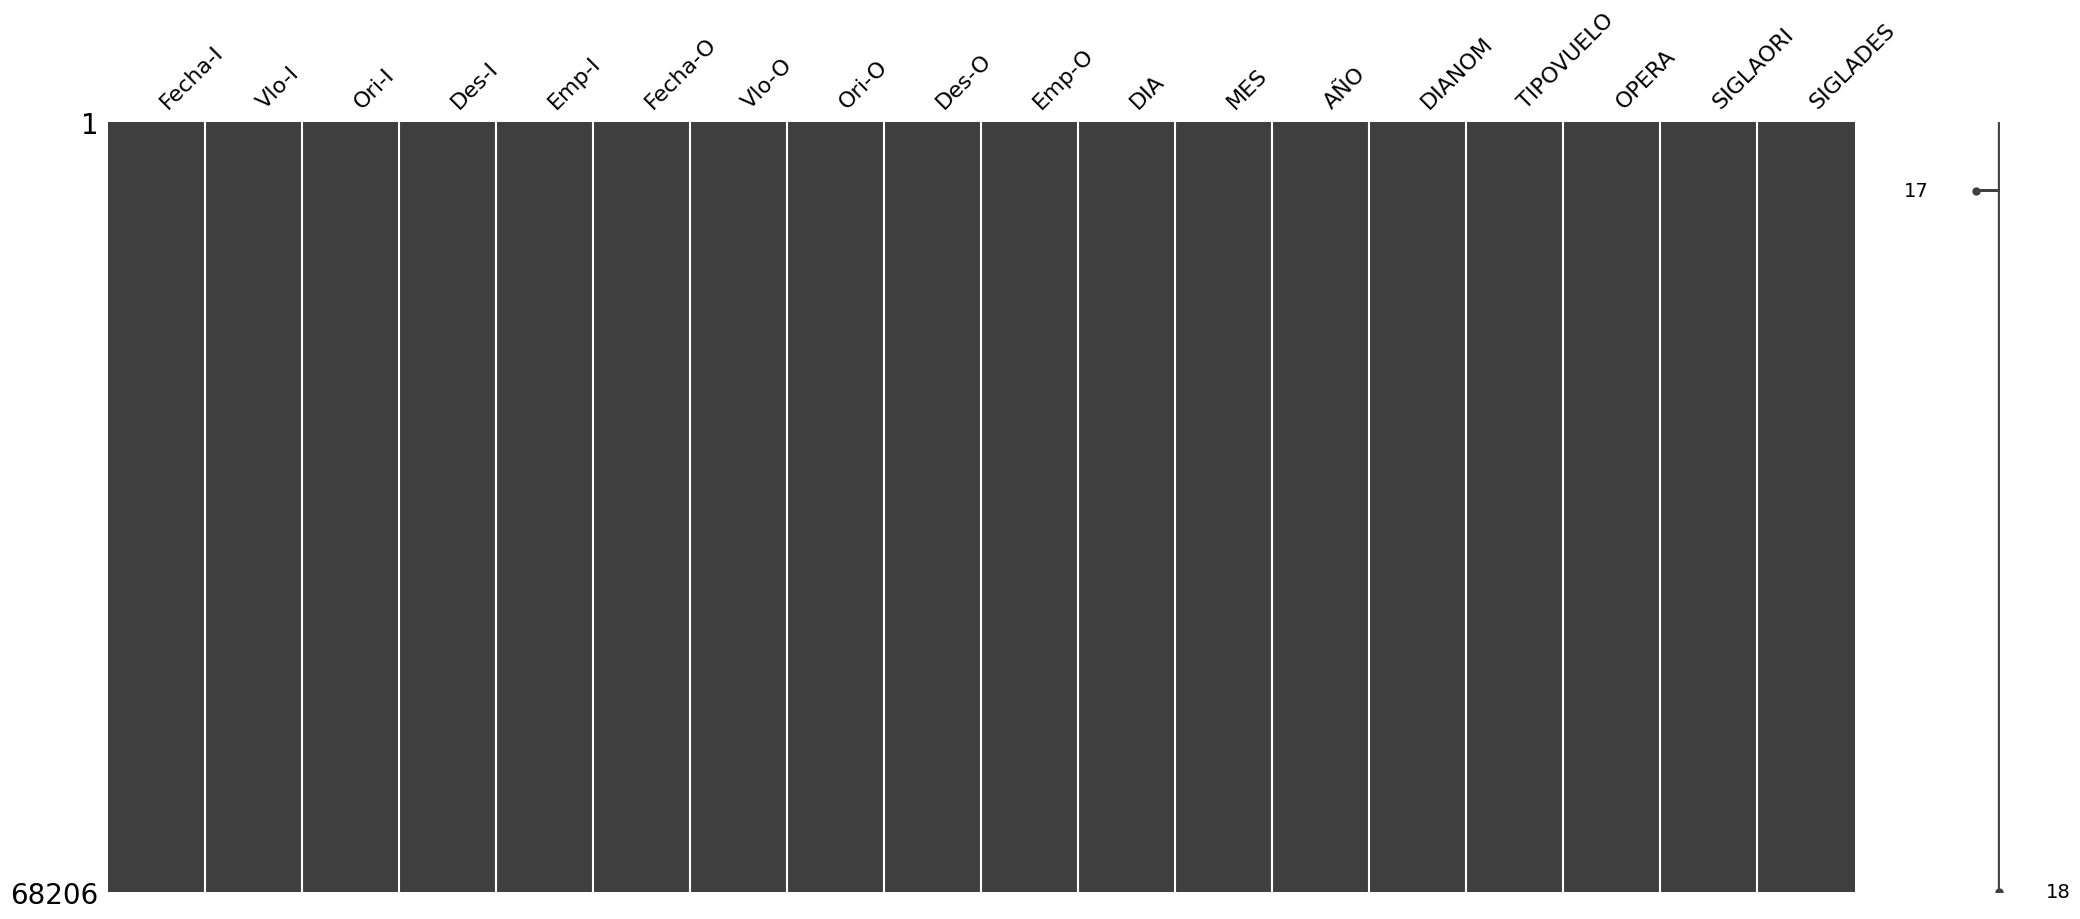

In [12]:
msng.matrix(df)

In [13]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Comentarios adicionales:

* Dado a que no están especificadas las versiones de las librerías usadas por Juan en su notebook, pueden haber problemas si una persona con otras versiones ejecuta su notebook.
* En mi caso, al parecer utilicé una versión más actual de `seaborn`, en donde para generar un `barplot` es necesario indicar los named parameters `x` e `y`, por lo que tuve que hacer unos pequeños cambios para generar los plots.

In [14]:
df["OPERA"].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

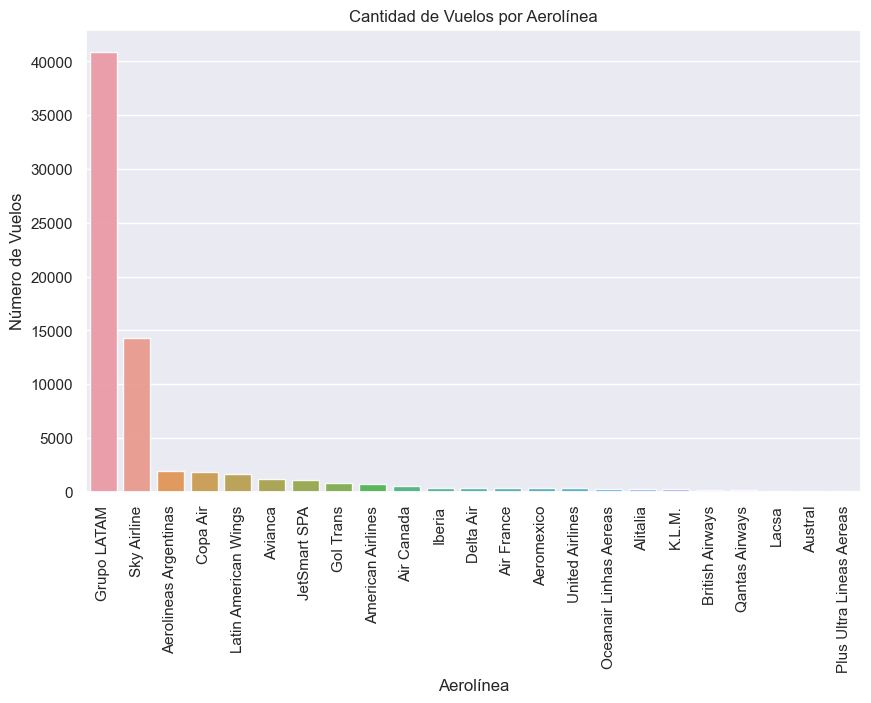

In [16]:
vuelos_aerolineas = df["OPERA"].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=vuelos_aerolineas.index, y=vuelos_aerolineas.values, alpha=0.9)
plt.title("Cantidad de Vuelos por Aerolínea")
plt.ylabel("Número de Vuelos", fontsize=12)
plt.xlabel("Aerolínea", fontsize=12)
plt.xticks(rotation=90)
plt.show()

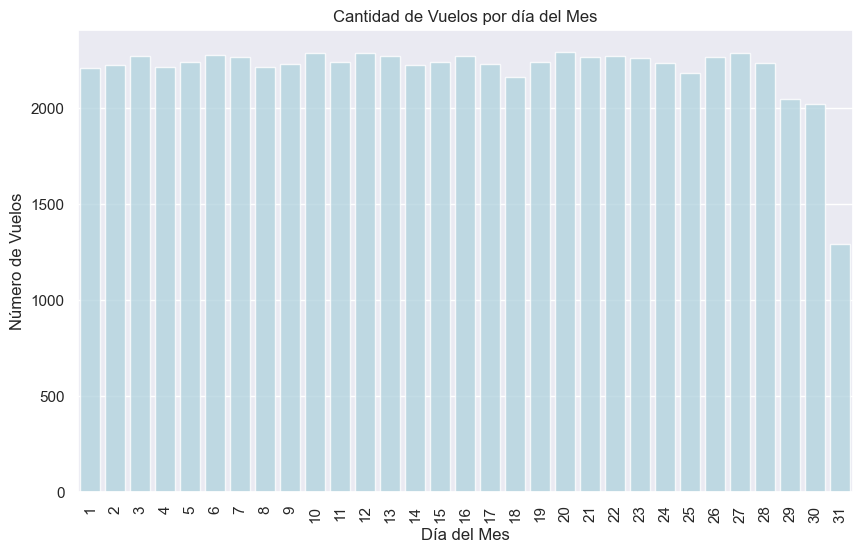

In [17]:
vuelos_dia = df["DIA"].value_counts()
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.barplot(x=vuelos_dia.index, y=vuelos_dia.values, color="lightblue", alpha=0.8)
plt.title("Cantidad de Vuelos por día del Mes")
plt.ylabel("Número de Vuelos", fontsize=12)
plt.xlabel("Día del Mes", fontsize=12)
plt.xticks(rotation=90)
plt.show()

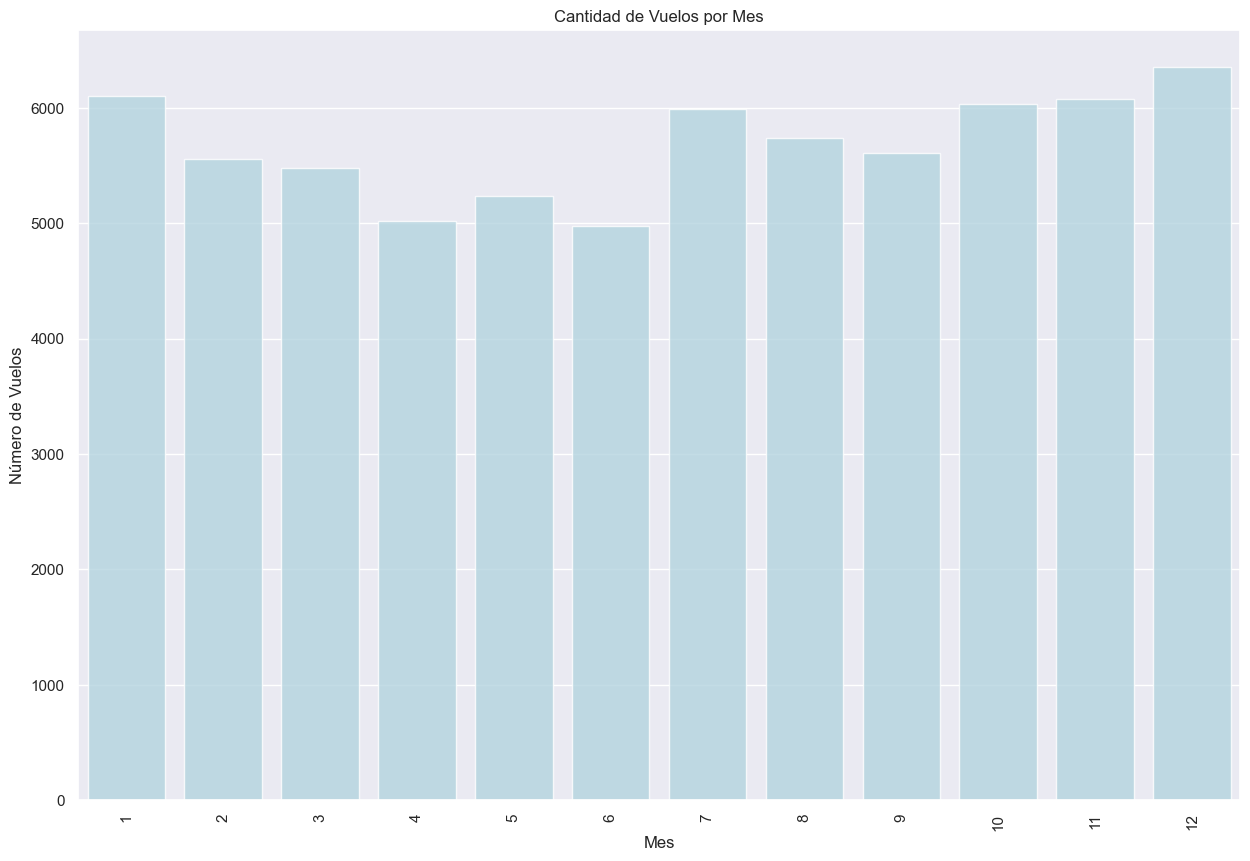

In [18]:
vuelos_mes = df["MES"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos_mes.index, y=vuelos_mes.values, color="lightblue", alpha=0.8)
plt.title("Cantidad de Vuelos por Mes")
plt.ylabel("Número de Vuelos", fontsize=12)
plt.xlabel("Mes", fontsize=12)
plt.xticks(rotation=90)
plt.show()

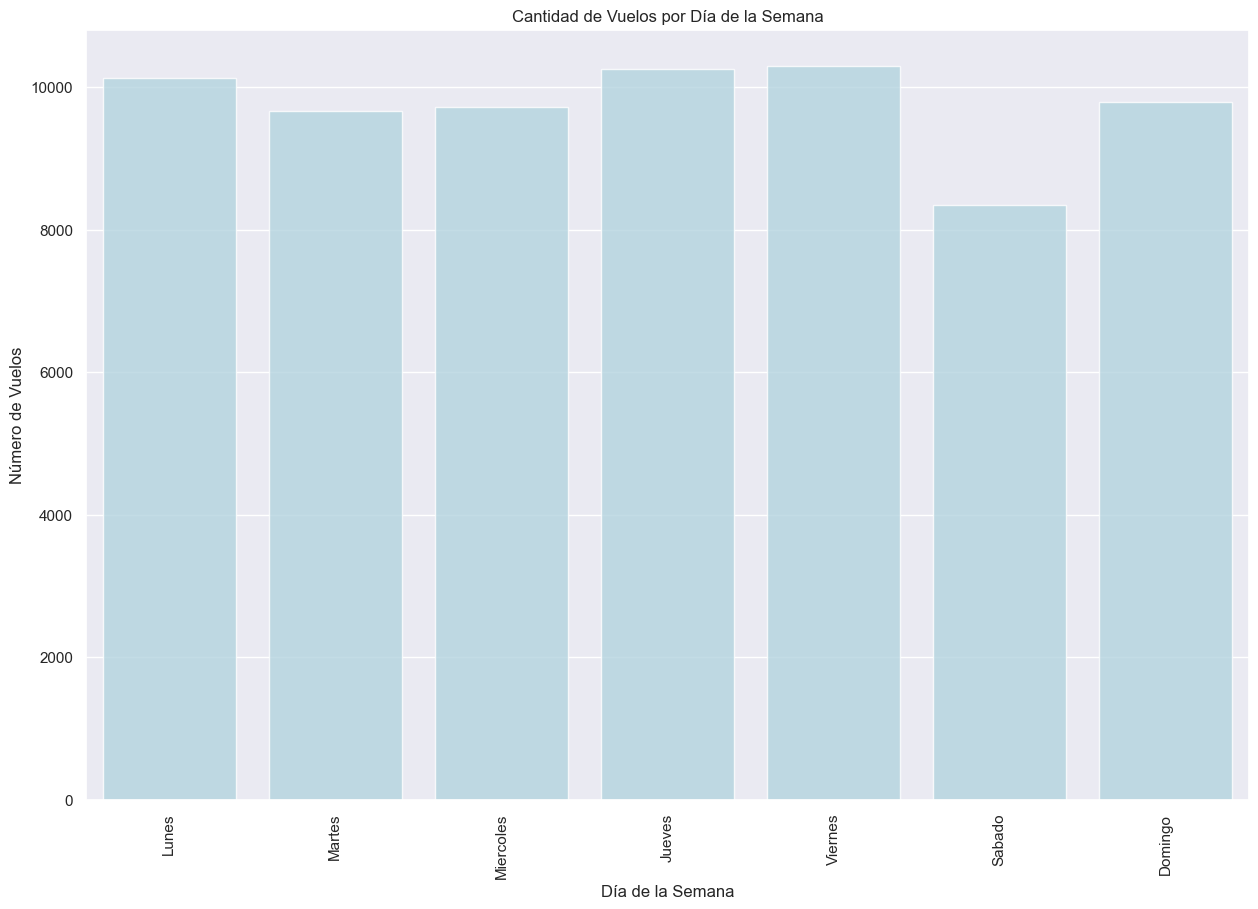

In [25]:
vuelos = df["DIANOM"].value_counts()
dias_ordenados = [
    "Lunes",
    "Martes",
    "Miercoles",
    "Jueves",
    "Viernes",
    "Sabado",
    "Domingo",
]
valores_dias = [vuelos[i] for i in dias_ordenados]

sns.set(style="darkgrid")
sns.barplot(x=dias_ordenados, y=valores_dias, color="lightblue", alpha=0.8)
plt.title("Cantidad de Vuelos por Día de la Semana")
plt.ylabel("Número de Vuelos", fontsize=12)
plt.xlabel("Día de la Semana", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Comentarios adicionales:

* Hice unos cambios para generar este gráfico puesto que no es buena idea usar los index y values de un Pandas Series obtenido a partir del Dataframe sin estar seguros de si está ordenado de cierta forma o no. Con esto me refiero a que si el Dataframe estuviera con otro orden, obtener el valor del día "Lunes" con `vuelos.values[2]` podría estar incorrecto y ser el valor de otro día. Es mejor usar un listado con los nombres de los índices, que en este caso son los nombres de los días de la semana, y usando eso ir a buscar el valor para cada día.

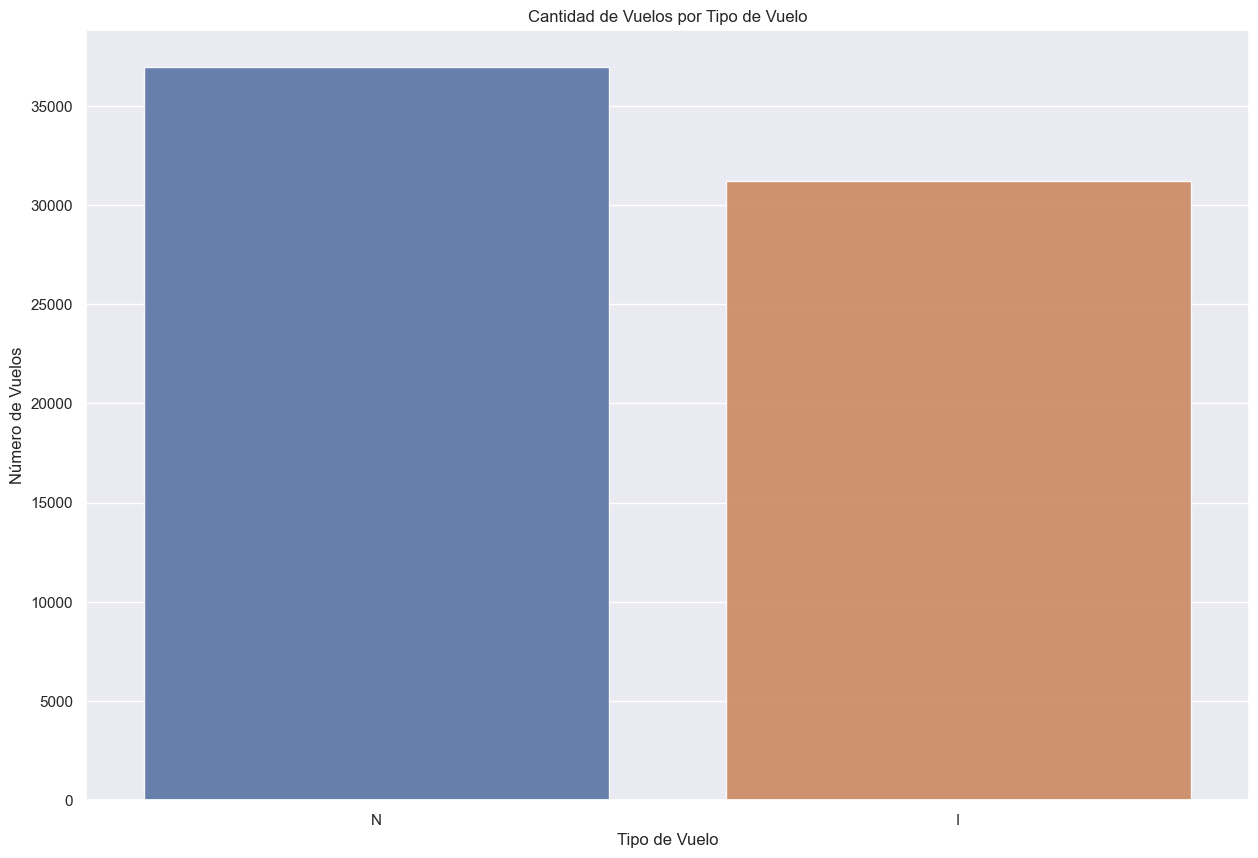

In [26]:
vuelos = df["TIPOVUELO"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, alpha=0.9)
plt.title("Cantidad de Vuelos por Tipo de Vuelo")
plt.ylabel("Número de Vuelos", fontsize=12)
plt.xlabel("Tipo de Vuelo", fontsize=12)
plt.show()

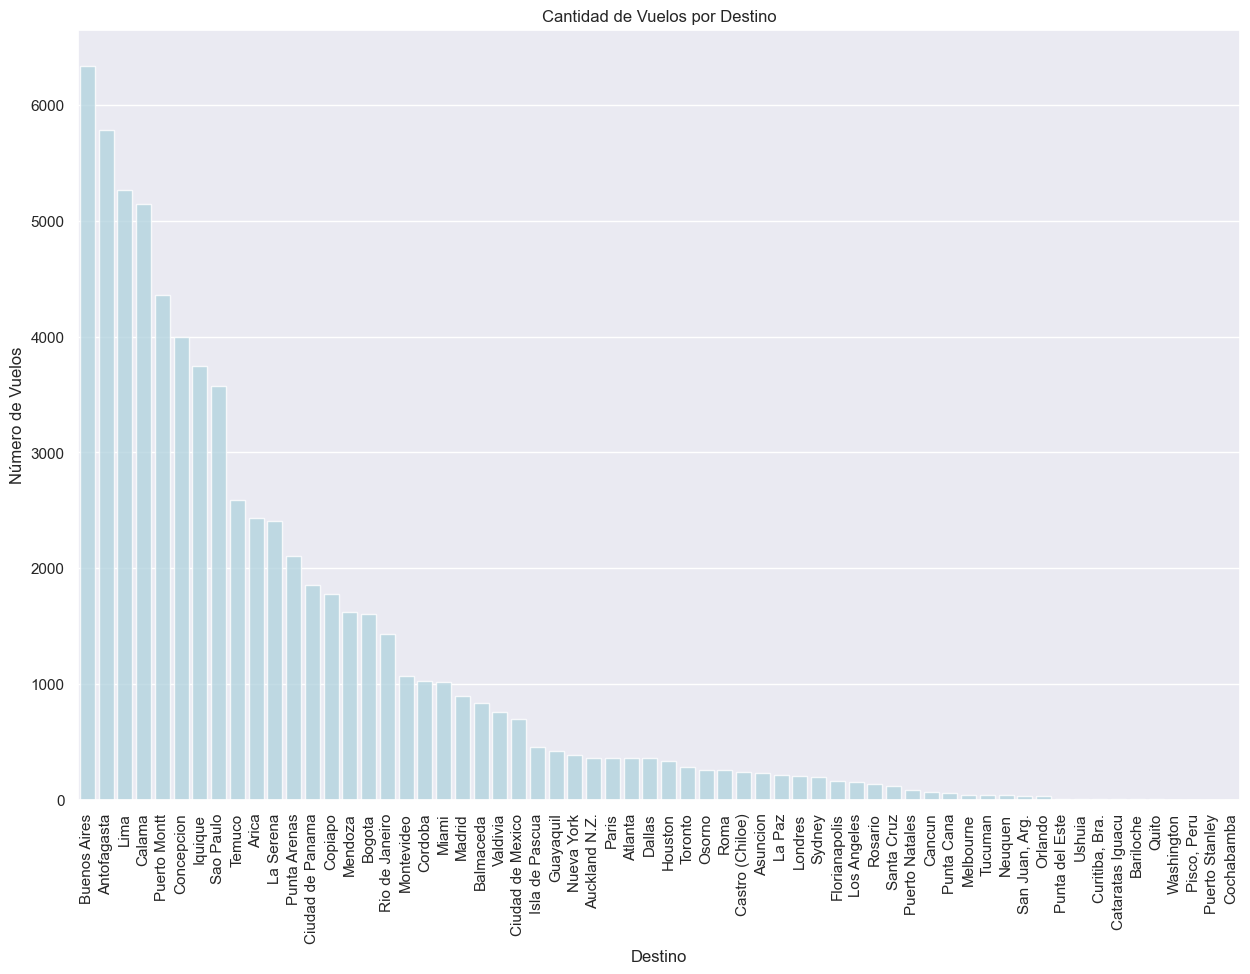

In [27]:
vuelos = df["SIGLADES"].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, color="lightblue", alpha=0.8)
plt.title("Cantidad de Vuelos por Destino")
plt.ylabel("Número de Vuelos", fontsize=12)
plt.xlabel("Destino", fontsize=12)
plt.xticks(rotation=90)

plt.show()

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [3]:
from datetime import datetime


def temporada_alta(fecha):
    # ideally don't use ñ
    fecha_año = int(fecha.split("-")[0])
    fecha = datetime.strptime(fecha, "%Y-%m-%d %H:%M:%S")
    range1_min = datetime.strptime("15-Dec", "%d-%b").replace(year=fecha_año)
    range1_max = datetime.strptime("31-Dec", "%d-%b").replace(year=fecha_año)
    range2_min = datetime.strptime("1-Jan", "%d-%b").replace(year=fecha_año)
    range2_max = datetime.strptime("3-Mar", "%d-%b").replace(year=fecha_año)
    range3_min = datetime.strptime("15-Jul", "%d-%b").replace(year=fecha_año)
    range3_max = datetime.strptime("31-Jul", "%d-%b").replace(year=fecha_año)
    range4_min = datetime.strptime("11-Sep", "%d-%b").replace(year=fecha_año)
    range4_max = datetime.strptime("30-Sep", "%d-%b").replace(year=fecha_año)

    if (
        (fecha >= range1_min and fecha <= range1_max)
        or (fecha >= range2_min and fecha <= range2_max)
        or (fecha >= range3_min and fecha <= range3_max)
        or (fecha >= range4_min and fecha <= range4_max)
    ):
        return 1
    else:
        return 0

In [4]:
df["temporada_alta"] = df["Fecha-I"].apply(temporada_alta)

In [5]:
df["temporada_alta"].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [6]:
def dif_min(data):
    fecha_o = datetime.strptime(data["Fecha-O"], "%Y-%m-%d %H:%M:%S")
    fecha_i = datetime.strptime(data["Fecha-I"], "%Y-%m-%d %H:%M:%S")
    dif_min = ((fecha_o - fecha_i).total_seconds()) / 60
    return dif_min

In [7]:
df["dif_min"] = df.apply(dif_min, axis=1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [8]:
df["atraso_15"] = np.where(df["dif_min"] > 15, 1, 0)

In [11]:
df["atraso_15"].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

Comentarios adicionales:

* Hay un pequeño "bug" en la función `get_periodo_dia` en la parte donde se evaluan las condiciones con la fecha para ver en qué categoría queda. Si la fecha es exactamente el valor de alguna de las cotas inferiores o superiores, no van a caer en ninguna condición puesto que solo se usan las condiciones `<` y `>`.
* Para corregirlo, se modifica para que se considere la condición `>=`.

In [9]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, "%Y-%m-%d %H:%M:%S").time()
    mañana_min = datetime.strptime("05:00:00", "%H:%M:%S").time()
    # mañana_max = datetime.strptime("11:59", "%H:%M").time()
    tarde_min = datetime.strptime("12:00:00", "%H:%M:%S").time()
    # tarde_max = datetime.strptime("18:59", "%H:%M").time()
    noche_min1 = datetime.strptime("19:00:00", "%H:%M:%S").time()
    noche_max1 = datetime.strptime("23:59:59", "%H:%M:%S").time()
    noche_min2 = datetime.strptime("00:00:00", "%H:%M:%S").time()
    # noche_max2 = datetime.strptime("4:59", "%H:%M").time()

    if fecha_time >= mañana_min and fecha_time < tarde_min:
        return "mañana"
    elif fecha_time >= tarde_min and fecha_time < noche_min1:
        return "tarde"
    elif (fecha_time >= noche_min1 and fecha_time <= noche_max1) or (
        fecha_time >= noche_min2 and fecha_time < mañana_min
    ):
        return "noche"

In [10]:
df["periodo_dia"] = df["Fecha-I"].apply(get_periodo_dia)

In [11]:
df[["temporada_alta", "dif_min", "atraso_15", "periodo_dia"]].to_csv(
    "synthetic_features.csv", index=False
)

Comentarios adicionales:

* Asumimos que `atraso_15` es nuestra variable a predecir (o "target"). Esto se debe definir desde un principio con los stakeholders interesados en este modelo/servicio y debe estar claro que "vuelo atrasado" implica un vuelo con 15 minutos o menos de demora.
* Es importante notar que hay un desbalance considerable en nuestra variable a predecir, puesto que más de un 80% corresponde a vuelos sin atraso.
* `temporada_alta` y `periodo_dia` creo que tienen potencial para ser buenos features para un modelo
* Dado a que se usa `dif_min` para calcular el target `atraso_15`, no deberíamos usar `dif_min` como feature en nuestro modelo porque está muy correlacionado con la variable que queremos predecir.

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

Comentarios adicionales:

* Creo que en la función `calcular_tasa` hay un bug al momento de calcular las tasas puesto que en la línea 15 se está dividiendo el total de filas de una columna en particular con la cantidad de vuelos con atraso para esa columna, cuando la división debiera ser al revés si es que quisieramos saber el porcentaje de vuelos con atraso con respecto al total de vuelos para esa columna.
* Esto no es **tan** relevante puesto que no se usan estas tasas como features en el modelo de Juan, pero sí puede ser relevante para hacer un correcto análisis y si eventualmente se usara un feature relacionado.

In [51]:
def calcular_tasa(df, columna):
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row["atraso_15"] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1

    total_values = df[columna].value_counts()

    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            # dic_tasas[name] = round(total / dic_atrasos[name], 2)
            dic_tasas[name] = round(dic_atrasos[name] / total, 2) * 100
        else:
            dic_tasas[name] = 0

    return pd.DataFrame.from_dict(data=dic_tasas, orient="index", columns=["Tasa (%)"])

In [52]:
# mirar un ejemplo
df[df["SIGLADES"] == "Quito"]["atraso_15"].value_counts()

1    2
Name: atraso_15, dtype: int64

In [53]:
tasas_destinos = calcular_tasa(df, "SIGLADES")
tasas_destinos

,Tasa (%)
Buenos Aires,26.0
Antofagasta,15.0
Lima,23.0
Calama,12.0
Puerto Montt,17.0
...,...
Quito,100.0
Washington,0.0
"Pisco, Peru",0.0
Puerto Stanley,100.0


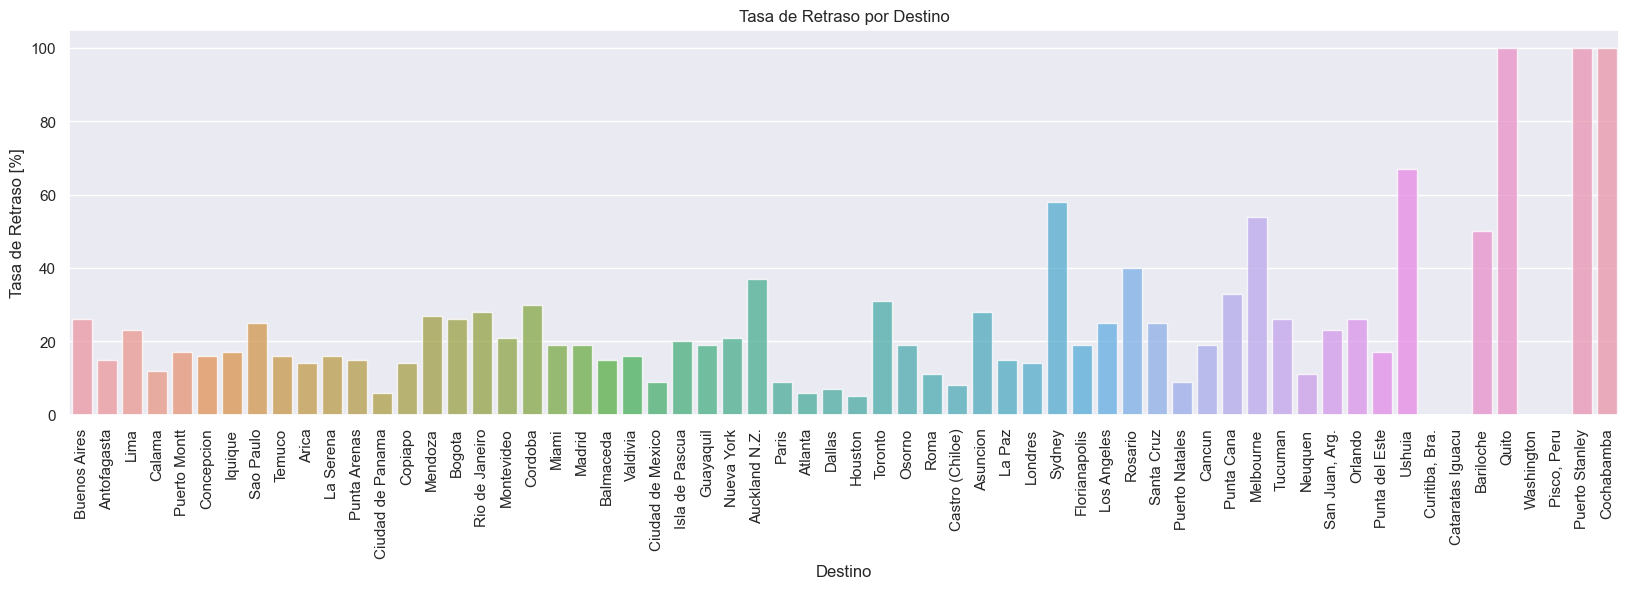

In [54]:
tasas_destinos_values = df["SIGLADES"].value_counts().index
plt.figure(figsize=(20, 5))
sns.set(style="darkgrid")
sns.barplot(
    x=df["SIGLADES"].value_counts().index, y=tasas_destinos["Tasa (%)"], alpha=0.75
)
plt.title("Tasa de Retraso por Destino")
plt.ylabel("Tasa de Retraso [%]", fontsize=12)
plt.xlabel("Destino", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [55]:
tasas_aerolineas = calcular_tasa(df, "OPERA")
tasas_aerolineas

,Tasa (%)
Grupo LATAM,18.0
Sky Airline,18.0
Aerolineas Argentinas,24.0
Copa Air,6.0
Latin American Wings,41.0
Avianca,27.0
JetSmart SPA,18.0
Gol Trans,36.0
American Airlines,7.0
Air Canada,46.0


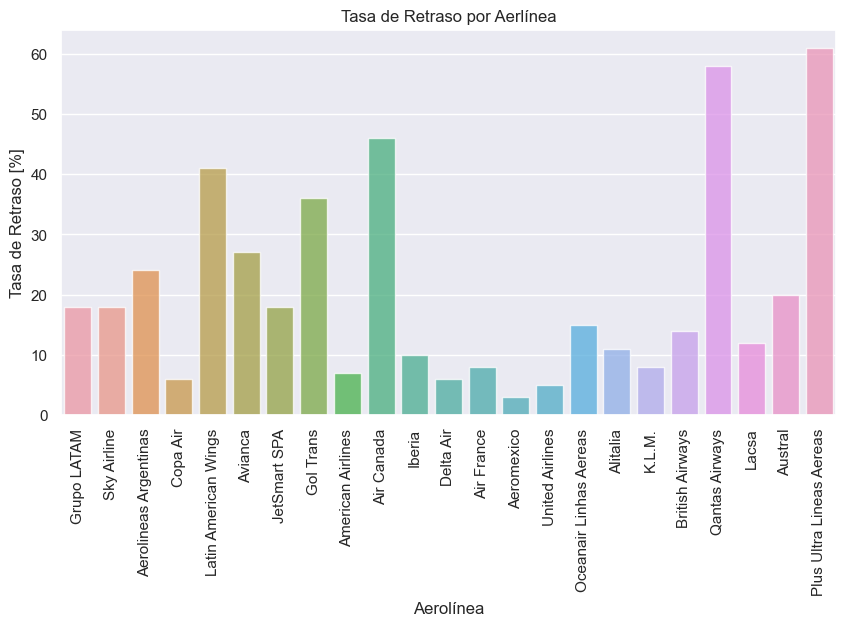

In [57]:
tasas_aerolineas_values = df["OPERA"].value_counts().index

plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_aerolineas_values, y=tasas_aerolineas["Tasa (%)"], alpha=0.75)
plt.title("Tasa de Retraso por Aerlínea")
plt.ylabel("Tasa de Retraso [%]", fontsize=12)
plt.xlabel("Aerolínea", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [58]:
tasas_meses = calcular_tasa(df, "MES")
tasas_meses

,Tasa (%)
12,25.0
1,16.0
11,20.0
10,23.0
7,29.0
8,17.0
9,17.0
2,15.0
3,12.0
5,16.0


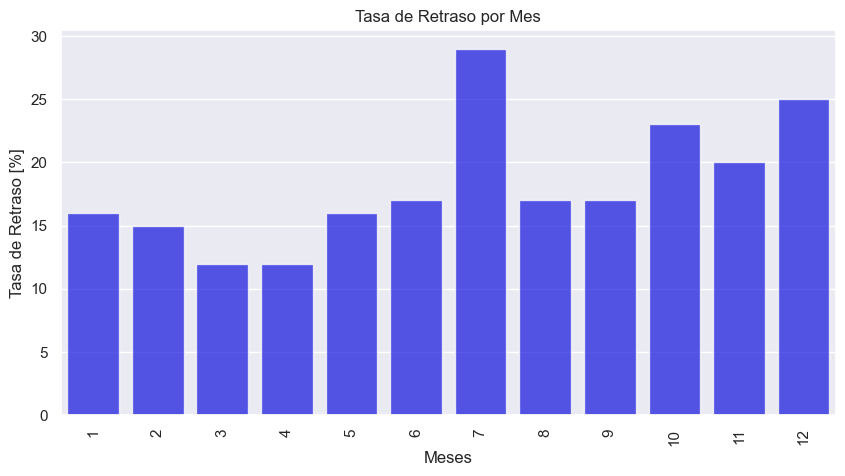

In [60]:
tasas_meses_values = df["MES"].value_counts().index

plt.figure(figsize=(10, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_meses_values, y=tasas_meses["Tasa (%)"], color="blue", alpha=0.75)
plt.title("Tasa de Retraso por Mes")
plt.ylabel("Tasa de Retraso [%]", fontsize=12)
plt.xlabel("Meses", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [61]:
tasas_dias = calcular_tasa(df, "DIANOM")
tasas_dias

,Tasa (%)
Viernes,22.0
Jueves,20.0
Lunes,20.0
Domingo,16.0
Miercoles,17.0
Martes,17.0
Sabado,16.0


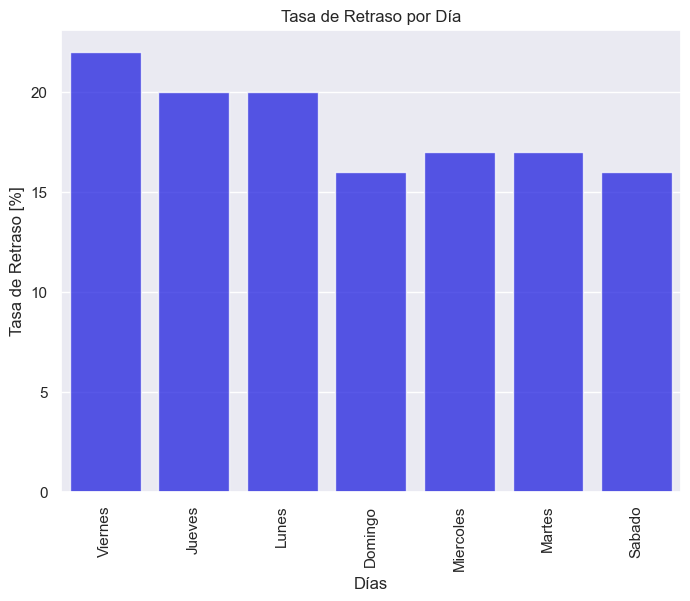

In [62]:
tasas_dias_values = df["DIANOM"].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=tasas_dias_values, y=tasas_dias["Tasa (%)"], color="blue", alpha=0.75)
plt.title("Tasa de Retraso por Día")
plt.ylabel("Tasa de Retraso [%]", fontsize=12)
plt.xlabel("Días", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [63]:
tasas_temporada = calcular_tasa(df, "temporada_alta")
tasas_temporada

,Tasa (%)
0,18.0
1,20.0


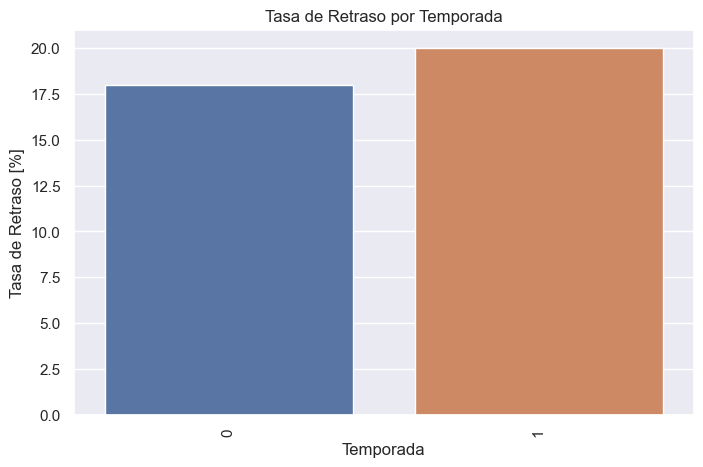

In [65]:
tasas_temporada_values = df["temporada_alta"].value_counts().index

plt.figure(figsize=(8, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_temporada_values, y=tasas_temporada["Tasa (%)"])
plt.title("Tasa de Retraso por Temporada")
plt.ylabel("Tasa de Retraso [%]", fontsize=12)
plt.xlabel("Temporada", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [66]:
tasas_tipovuelo = calcular_tasa(df, "TIPOVUELO")
tasas_tipovuelo

,Tasa (%)
N,15.0
I,23.0


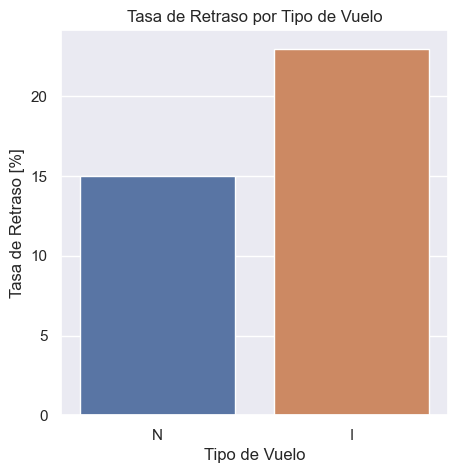

In [67]:
tasas_tipovuelo_values = df["TIPOVUELO"].value_counts().index

plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_tipovuelo_values, y=tasas_tipovuelo["Tasa (%)"])
plt.title("Tasa de Retraso por Tipo de Vuelo")
plt.ylabel("Tasa de Retraso [%]", fontsize=12)
plt.xlabel("Tipo de Vuelo", fontsize=12)
plt.show()

In [147]:
tasa_periododia = calcular_tasa(df, "periodo_dia")
tasa_periododia

,Tasa (%)
tarde,20.0
mañana,16.0
noche,20.0


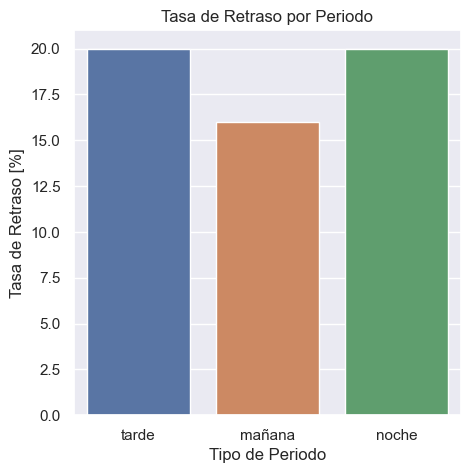

In [148]:
tasas_periodo_values = df["periodo_dia"].value_counts().index

plt.figure(figsize=(5, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_periodo_values, y=tasa_periododia["Tasa (%)"])
plt.title("Tasa de Retraso por Periodo")
plt.ylabel("Tasa de Retraso [%]", fontsize=12)
plt.xlabel("Tipo de Periodo", fontsize=12)
plt.show()

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
data = shuffle(
    df[["OPERA", "MES", "TIPOVUELO", "SIGLADES", "DIANOM", "atraso_15"]],
    random_state=111,
)

In [14]:
features = pd.concat(
    [
        pd.get_dummies(data["OPERA"], prefix="OPERA"),
        pd.get_dummies(data["TIPOVUELO"], prefix="TIPOVUELO"),
        pd.get_dummies(data["MES"], prefix="MES"),
    ],
    axis=1,
)
label = data["atraso_15"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    features, label, test_size=0.33, random_state=42
)

In [19]:
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [92]:
y_train.value_counts("%")

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [93]:
y_test.value_counts("%")

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

#### Utilizando Regresión logística

In [94]:
logReg = LogisticRegression()
model = logReg.fit(x_train, y_train)

In [95]:
y_pred = model.predict(x_test)

#### Métricas Regresión Logística

In [96]:
confusion_matrix(y_test, y_pred)

array([[18311,    92],
       [ 3985,   120]], dtype=int64)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost

In [15]:
import xgboost as xgb
from xgboost import plot_importance

In [99]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

In [100]:
y_predxgb = modelxgb.predict(x_test)

#### Métricas XGBoost

In [101]:
confusion_matrix(y_test, y_predxgb)

array([[18359,    44],
       [ 4017,    88]], dtype=int64)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost dejando Features más importantes 

In [103]:
modelxgb.feature_importances_

array([0.01000502, 0.03812766, 0.0774048 , 0.        , 0.        ,
       0.05326247, 0.        , 0.        , 0.        , 0.11452038,
       0.        , 0.05899746, 0.00510737, 0.        , 0.00056586,
       0.        , 0.        , 0.03438188, 0.        , 0.00872514,
       0.0687452 , 0.03494434, 0.02305363, 0.17575102, 0.        ,
       0.01610017, 0.00777403, 0.02387431, 0.00835021, 0.01279221,
       0.01183943, 0.06969901, 0.00991499, 0.01740215, 0.03937674,
       0.02739293, 0.05189164], dtype=float32)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1300x1000 with 0 Axes>

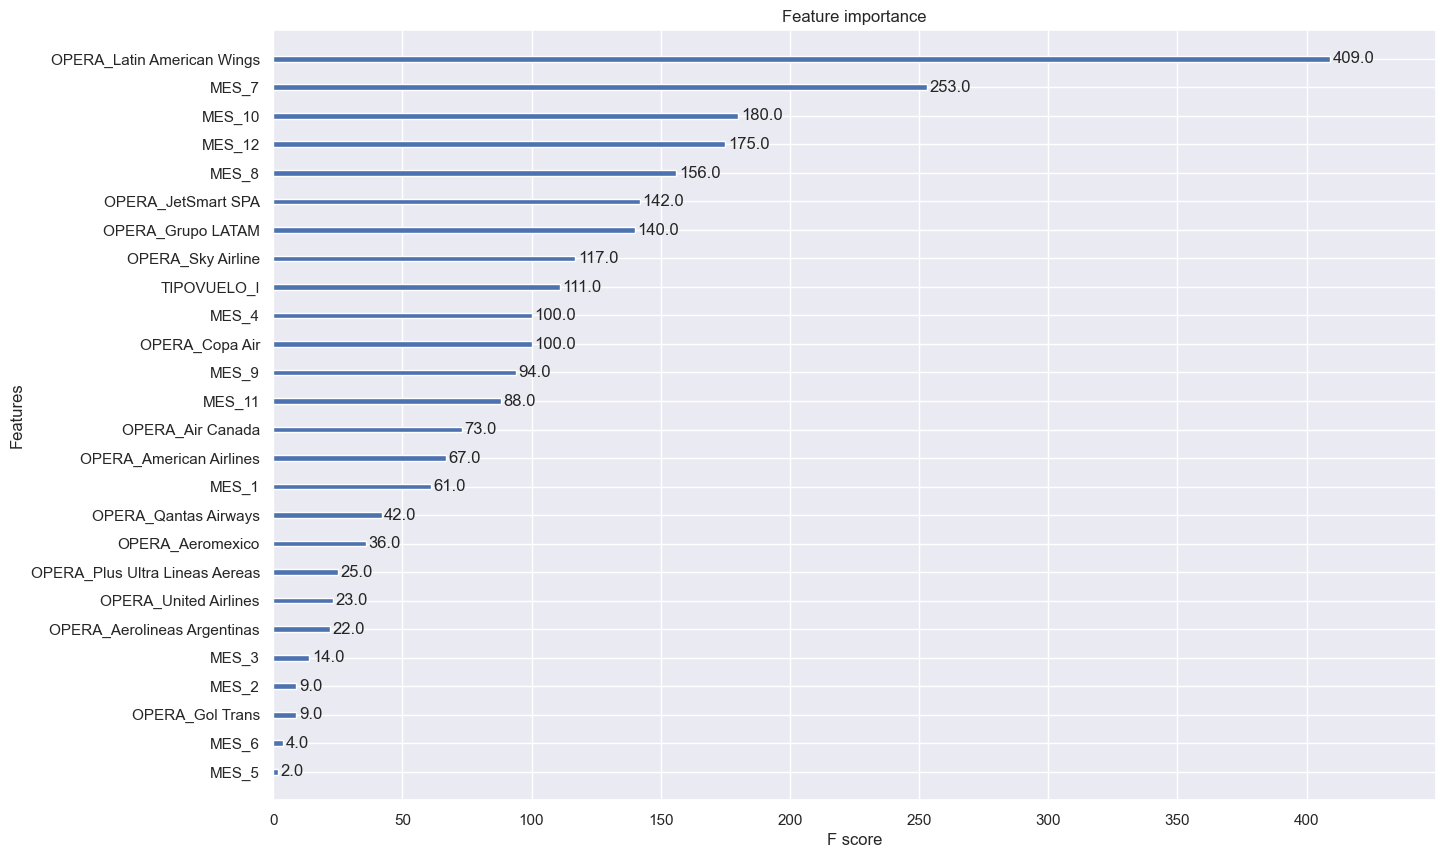

In [106]:
plt.figure(figsize=(13, 10))
plot_importance(modelxgb)

In [105]:
features_importantes = features[
    [
        "MES_7",
        "TIPOVUELO_I",
        "OPERA_Copa Air",
        "OPERA_Latin American Wings",
        "MES_12",
        "OPERA_Grupo LATAM",
        "MES_10",
        "OPERA_JetSmart SPA",
        "OPERA_Air Canada",
        "MES_9",
        "OPERA_American Airlines",
    ]
]
labels_ = label

In [107]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    features_importantes, labels_, test_size=0.33, random_state=42
)

In [108]:
modelxgb = xgb.XGBClassifier(
    random_state=1, learning_rate=0.01, subsample=1, max_depth=10
)
modelxgb = modelxgb.fit(x_train2, y_train2)

In [109]:
y_predxgb = modelxgb.predict(x_test2)

#### Métricas XGBoost dejando Features más importantes 

In [110]:
confusion_matrix(y_test2, y_predxgb)

array([[18371,    32],
       [ 4044,    61]], dtype=int64)

In [111]:
print(classification_report(y_test2, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.66      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.46     22508
weighted avg       0.79      0.82      0.74     22508



### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar laperformance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.

Los resultados obtenidos con ambos modelos fueron muy malos. Se utilizó matriz de confusión para validar los resultados. La cantidad de falsos negativos fue muy alta. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre XGBoost para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos.



### Grid Search CV

In [16]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [50, 100, 150],
    "subsample": [0.5, 0.9],
}

modelxgb_GridCV = GridSearchCV(
    modelxgb, param_grid=parameters, cv=2, n_jobs=-1, verbose=1
).fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [114]:
modelxgb_GridCV.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.5}

In [115]:
y_predxgb_grid = modelxgb_GridCV.predict(x_test)

In [116]:
confusion_matrix(y_test, y_predxgb_grid)

array([[18287,   116],
       [ 3933,   172]], dtype=int64)

In [117]:
print(classification_report(y_test, y_predxgb_grid))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     18403
           1       0.60      0.04      0.08      4105

    accuracy                           0.82     22508
   macro avg       0.71      0.52      0.49     22508
weighted avg       0.78      0.82      0.75     22508



### Upsampling

In [118]:
data["atraso_15"].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [17]:
# Resample
from sklearn.utils import resample

data_no_retraso = data[data["atraso_15"] == 0]
data_atraso = data[data["atraso_15"] == 1]

data_atraso_upsampled = resample(
    data_atraso,
    replace=True,  # sample with replacement
    n_samples=30000,  # to match majority class
    random_state=42,
)  # reproducible results

data_upsampled = pd.concat([data_no_retraso, data_atraso_upsampled])

In [120]:
data_upsampled["atraso_15"].value_counts()

0    55592
1    30000
Name: atraso_15, dtype: int64

In [121]:
features_upsampled = pd.concat(
    [
        pd.get_dummies(data_upsampled["OPERA"], prefix="OPERA"),
        pd.get_dummies(data_upsampled["TIPOVUELO"], prefix="TIPOVUELO"),
        pd.get_dummies(data_upsampled["MES"], prefix="MES"),
    ],
    axis=1,
)
label_upsampled = data_upsampled["atraso_15"]

In [122]:
(
    x_upsampled_train,
    x_upsampled_test,
    y_upsampled_train,
    y_upsampled_test,
) = train_test_split(
    features_upsampled, label_upsampled, test_size=0.33, random_state=42
)

In [123]:
modelxgb = xgb.XGBClassifier(
    random_state=1, learning_rate=0.01, subsample=1, max_depth=10
)
modelxgb.fit(x_upsampled_train, y_upsampled_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [124]:
y_upsampled_predxgb = modelxgb.predict(x_upsampled_test)

In [125]:
confusion_matrix(y_upsampled_test, y_upsampled_predxgb)

array([[17156,  1193],
       [ 7969,  1928]], dtype=int64)

In [126]:
modelxgb.score(x_upsampled_test, y_upsampled_test)

0.6756354882107201

In [127]:
print(classification_report(y_upsampled_test, y_upsampled_predxgb))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79     18349
           1       0.62      0.19      0.30      9897

    accuracy                           0.68     28246
   macro avg       0.65      0.56      0.54     28246
weighted avg       0.66      0.68      0.62     28246



Observando los dos métodos para incrementar la performance, se puede ver como el modelo no mejoró. Esto puede ser ya que la data creada al upsamplear no tiene ningún sentido. Si se pudiese pudiese balancear la clase tal vez los modelos tendrían un mejor desempeño.

# Trabajo de Rodrigo

## Observaciones y modificaciones sobre el trabajo de Juan

* Hice algunas modificaciones en el código de Juan y algunos comentarios en las celdas anteriores a esta.
* En particular, los cambios fueron relacionados a la versión de `seaborn`, a un pequeño bug en el cálculo de las tasas de atraso por columna y a otro en el cálculo del periodo del día.

A continuación, voy a elegir entre los modelos de Juan cual es el mejor y luego propondré algunos cambios para entrenar nuevos modelos.

### 1. Escoger modelo de Juan con mejor performance

Vamos a comparar 5 modelos de Juan para ver cuál tiene mejor performance:

1. Logistic Regression
2. XGBoost V1 (versión simple, sin elegir features más importantes y sin hyperparameter tuning)
3. XGBoost V2 (usando solo features más importantes según Juan)
4. XGBoost V3 (usando todos los features y con hyperparameter tuning)
5. XGBoost V4 (usando todos los features y usando upsampling)

Juan ya calculó algunas métricas de evaluación de los modelos y sus matrices de confusión. Lamentablemente, el desempeño de los modelos es bastante similar (en todos los casos es malo) por lo que a simple vista no hay un claro ganador.

Vamos a proponer algunos cambios y métricas nuevas para ver si podemos encontrar un ganador:

#### 1.0 Agregar estratificación al `train_test_split`

El primer cambio será agregar el parámetro `stratify` al método `train_test_split`, para así asegurarnos de que el split de train y test tienen la misma proporción de vuelos con atraso.

Esto es especialmente importante cuando tenemos un dataset tan desbalanceado como el que tenemos ahora. De esta forma nos aseguramos de que el modelo está siendo evaluado con una distribución similar a la distribución con la que fue entrenado.

In [18]:
data = shuffle(
    df[["OPERA", "MES", "TIPOVUELO", "SIGLADES", "DIANOM", "atraso_15"]],
    random_state=111,
)
features = pd.concat(
    [
        pd.get_dummies(data["OPERA"], prefix="OPERA"),
        pd.get_dummies(data["TIPOVUELO"], prefix="TIPOVUELO"),
        pd.get_dummies(data["MES"], prefix="MES"),
    ],
    axis=1,
)
label = data["atraso_15"]

x_train, x_test, y_train, y_test = train_test_split(
    features, label, test_size=0.33, random_state=42, stratify=label
)

In [22]:
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45698 entries, 2100 to 34205
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   OPERA_Aerolineas Argentinas     45698 non-null  uint8
 1   OPERA_Aeromexico                45698 non-null  uint8
 2   OPERA_Air Canada                45698 non-null  uint8
 3   OPERA_Air France                45698 non-null  uint8
 4   OPERA_Alitalia                  45698 non-null  uint8
 5   OPERA_American Airlines         45698 non-null  uint8
 6   OPERA_Austral                   45698 non-null  uint8
 7   OPERA_Avianca                   45698 non-null  uint8
 8   OPERA_British Airways           45698 non-null  uint8
 9   OPERA_Copa Air                  45698 non-null  uint8
 10  OPERA_Delta Air                 45698 non-null  uint8
 11  OPERA_Gol Trans                 45698 non-null  uint8
 12  OPERA_Grupo LATAM               45698 non-null  uint8
 13

In [23]:
y_train.value_counts(normalize=True)

0    0.815068
1    0.184932
Name: atraso_15, dtype: float64

In [27]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22508 entries, 31011 to 68097
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   OPERA_Aerolineas Argentinas     22508 non-null  uint8
 1   OPERA_Aeromexico                22508 non-null  uint8
 2   OPERA_Air Canada                22508 non-null  uint8
 3   OPERA_Air France                22508 non-null  uint8
 4   OPERA_Alitalia                  22508 non-null  uint8
 5   OPERA_American Airlines         22508 non-null  uint8
 6   OPERA_Austral                   22508 non-null  uint8
 7   OPERA_Avianca                   22508 non-null  uint8
 8   OPERA_British Airways           22508 non-null  uint8
 9   OPERA_Copa Air                  22508 non-null  uint8
 10  OPERA_Delta Air                 22508 non-null  uint8
 11  OPERA_Gol Trans                 22508 non-null  uint8
 12  OPERA_Grupo LATAM               22508 non-null  uint8
 1

In [24]:
y_test.value_counts(normalize=True)

0    0.815044
1    0.184956
Name: atraso_15, dtype: float64

#### 1.1 Agregar AUC a las métricas de evaluación

El segundo cambio es agregar el roc_auc_score (lo llamaremos AUC por simplicidad). Al tratar con datasets desbalanceados, el `accuracy` podría ser engañoso dada la distribución desproporcionada de la variable target. En lugar de eso, se recomienda usar metricas que se enfoquen en la clase minoritaria, en este caso vuelos atrasados. Una métrica usada comúnmente en problemas de clasificación con desbalance es el roc_auc, que mide la habilidad de un modelo para discriminar entre muestras positivas y negativas a través de varios thresholds. Considera el performance general del modelo. Un roc_auc (o AUC) más alto indica un mejor trabajo del modelo para distinguir entre vuelos atrasados y no atrasados.

In [19]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)


def get_classification_metrics(
    y_test: pd.Series,
    y_pred: np.ndarray,
):
    print(f"Getting metrics")
    print("------------------------------------------")

    binary_pred = [np.round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, binary_pred)
    print(f"accuracy: {accuracy}")

    precision = precision_score(y_test, binary_pred)
    print(f"precision: {precision}")

    recall = recall_score(y_test, binary_pred)
    print(f"recall: {recall}")

    f1 = f1_score(y_test, binary_pred)
    print(f"f1: {f1}")

    auc = roc_auc_score(y_test, y_pred)
    print(f"AUC: {auc}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, binary_pred)
    print("Confusion Matrix:")

    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

    # Add labels, title, and axis ticks
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5], ["Negative", "Positive"])
    plt.yticks([0.5, 1.5], ["Negative", "Positive"])

    # Show the plot
    plt.show()

In [29]:
logReg = LogisticRegression()
reg_model = logReg.fit(x_train, y_train)

In [30]:
y_pred = reg_model.predict_proba(x_test)[:, 1]

Getting metrics
------------------------------------------
accuracy: 0.8155322551981518
precision: 0.5238095238095238
recall: 0.02906557770838338
f1: 0.05507510241238052
AUC: 0.6643085490047268
Confusion Matrix:


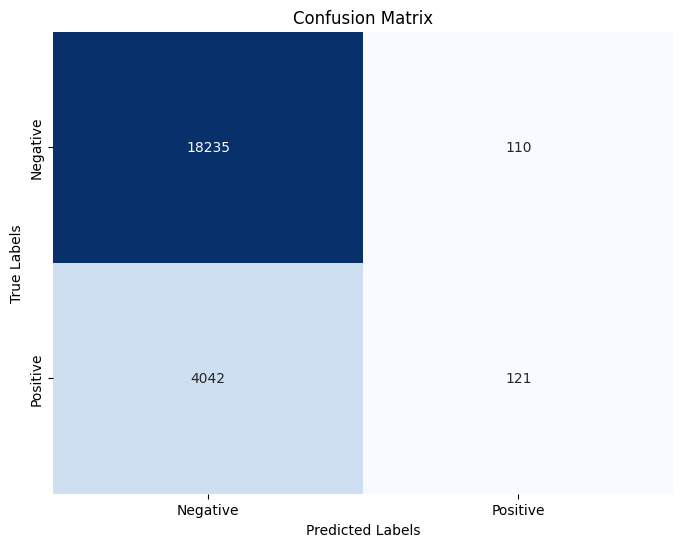

In [31]:
get_classification_metrics(y_test, y_pred)

#### 1.2 Cambiar `eval_metric` para XGBoost: usar AUC

El tercer cambio es cambiar el eval_metric = 'logloss' que se usa por defecto en XGBClassifier y usar 'auc', por razones similares al cambio anterior. LogLoss mide el performance de la clasificación del modelo penalizando la diferencia entre las probabilidades predichas y la clase real. Es sensible a desbalances en el dataset, por lo que puede llevar a biases en las predicciones al enfocarse más en predecir correctamente la clase mayoritaria. 

In [35]:
xgb_v1 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, eval_metric="auc")
xgb_v1 = xgb_v1.fit(x_train, y_train)

In [36]:
y_pred = xgb_v1.predict_proba(x_test)[:, 1]

Getting metrics
------------------------------------------
accuracy: 0.8172649724542385
precision: 0.6953125
recall: 0.021378813355753062
f1: 0.04148217198788161
AUC: 0.6500733302706219
Confusion Matrix:


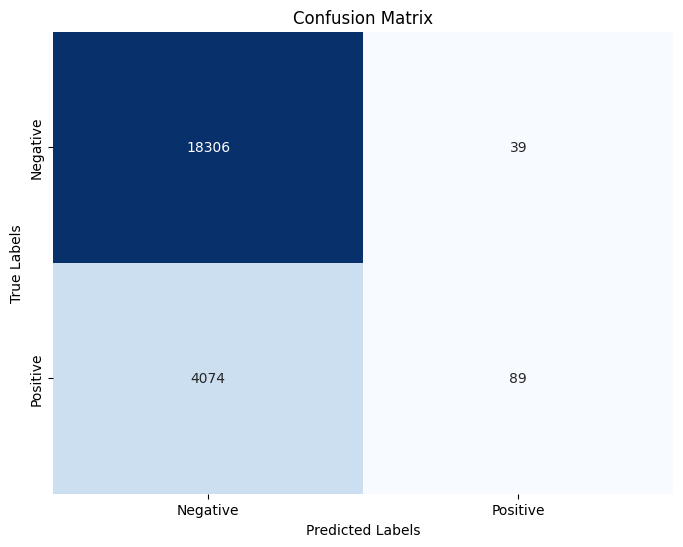

In [37]:
get_classification_metrics(y_test, y_pred)

#### 1.3 Obtener feature importance pero utilizando `importance_type="gain"`

Al usar importance_type = "gain", el cálculo se basa en qué tanto mejoró la métrica que se está optimizando como resultado de los splits de cada feature (e.g. qué tanto afecta en el loss un cambio en el valor de un feature). En cambio, el valor por
defecto en XGBoost que es importance_type = "weight" (y "split" en LightGBM), es simplemente el número de veces que cada feature se usa en un split, sin importar qué tanto fue su impacto. Esto significa que tiende a darle mayor importance a features que tienen una cardinalidad más alta (más valores únicos).

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

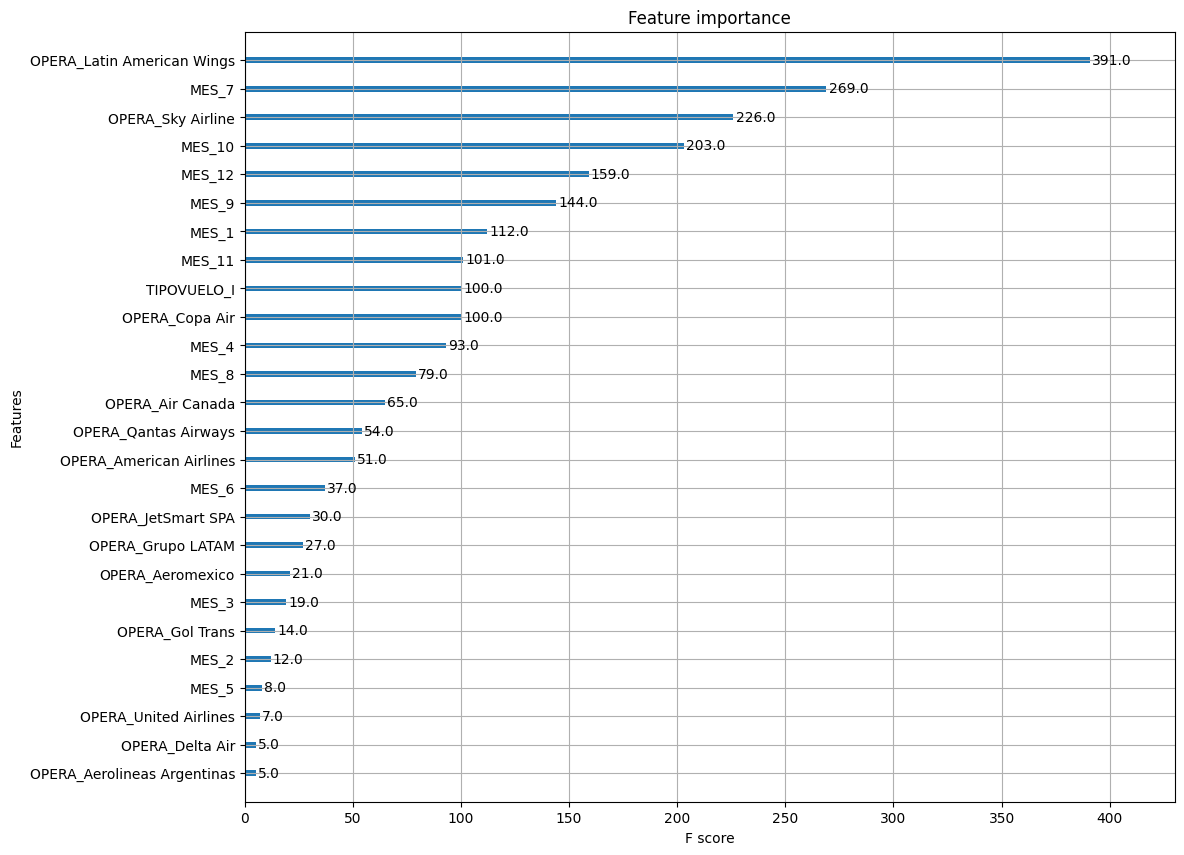

In [39]:
# Weight (default): The number of times a feature is used to split the data across all trees.
fig, ax = plt.subplots(figsize=(12, 10))
plot_importance(xgb_v1, importance_type="weight", ax=ax)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

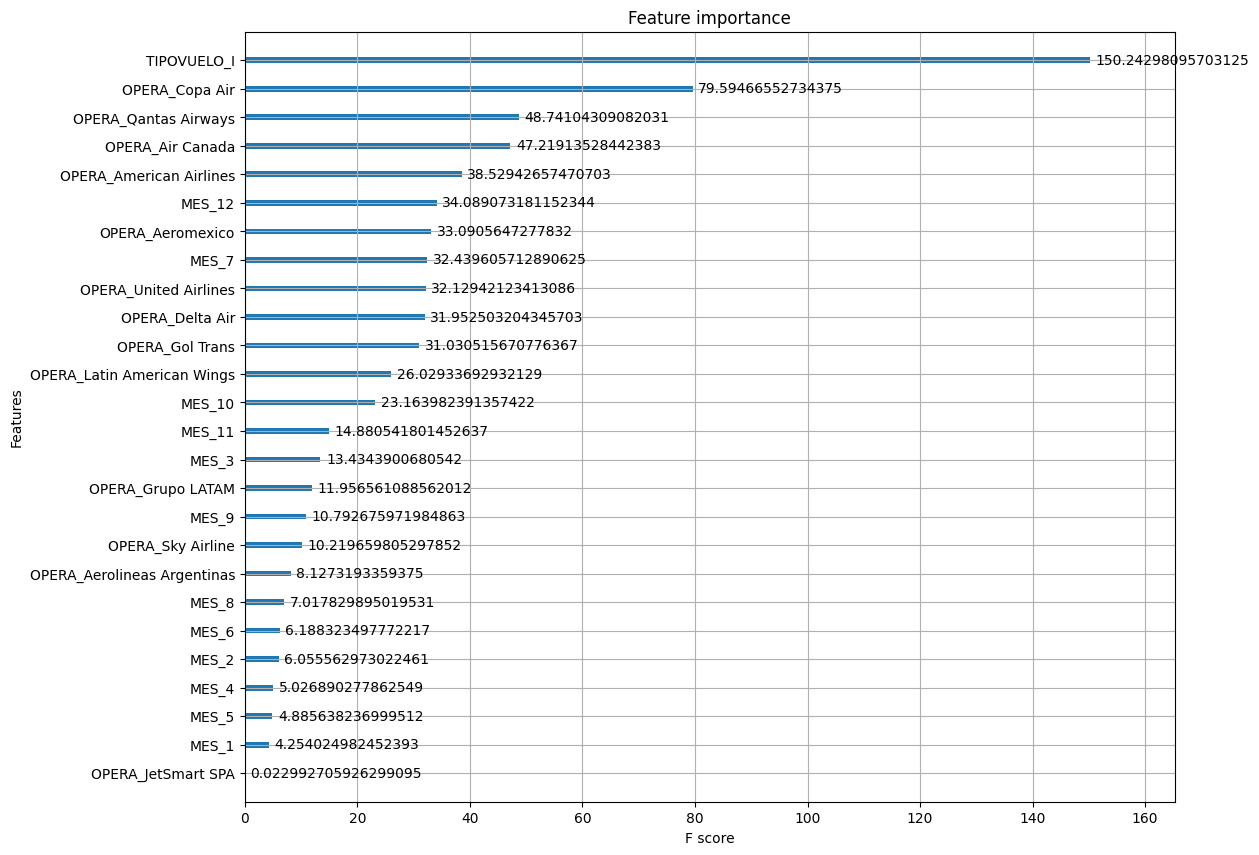

In [38]:
# Gain: The average training loss reduction gained when using a feature for splitting.
fig, ax = plt.subplots(figsize=(12, 10))
plot_importance(xgb_v1, importance_type="gain", ax=ax)

Siguiendo la idea de Juan, tomamos los 11 features más importantes pero usando el criterio `gain` y entrenamos un nuevo modelo:

In [49]:
# Get the feature importance dictionary
importance_dict = xgb_v1._Booster.get_score(importance_type="gain")

# Create a DataFrame from the feature importance dictionary
importance_df = pd.DataFrame(list(importance_dict.items()), columns=["Feature", "Gain"])

# Sort the DataFrame by the 'Gain' column in descending order
importance_df = importance_df.sort_values(by="Gain", ascending=False)

# Get the top 11 most relevant features
top_11_features = importance_df.head(11)["Feature"].tolist()

# Print the top 10 most relevant features
print("Top 11 Most Relevant Features:")
print(top_11_features)

Top 11 Most Relevant Features:
['TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Qantas Airways', 'OPERA_Air Canada', 'OPERA_American Airlines', 'MES_12', 'OPERA_Aeromexico', 'MES_7', 'OPERA_United Airlines', 'OPERA_Delta Air', 'OPERA_Gol Trans']


In [50]:
xgb_v2 = xgb.XGBClassifier(
    random_state=1, learning_rate=0.01, subsample=1, max_depth=10, eval_metric="auc"
)
xgb_v2 = xgb_v2.fit(x_train[top_11_features], y_train)

In [52]:
y_pred = xgb_v2.predict_proba(x_test[top_11_features])[:, 1]

Getting metrics
------------------------------------------
accuracy: 0.8157099697885196
precision: 0.5949367088607594
recall: 0.011289935142925775
f1: 0.02215935879302216
AUC: 0.6291452946295112
Confusion Matrix:


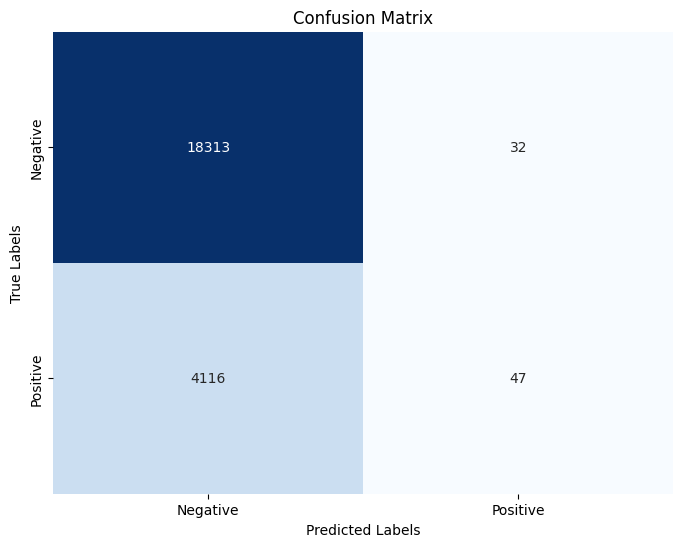

In [53]:
get_classification_metrics(y_test, y_pred)

In [62]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [50, 100, 150],
    "subsample": [0.5, 0.9],
}

xgb_base = xgb.XGBClassifier(random_state=1, learning_rate=0.01, eval_metric="auc")

xgb_v3 = GridSearchCV(xgb_base, param_grid=parameters, cv=2, n_jobs=-1, verbose=1).fit(
    x_train, y_train
)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [66]:
xgb_v3_best = xgb_v3.best_estimator_

In [67]:
y_pred = xgb_v3_best.predict_proba(x_test)[:, 1]

Getting metrics
------------------------------------------
accuracy: 0.81797583081571
precision: 0.627906976744186
recall: 0.03891424453519097
f1: 0.0732865867450803
AUC: 0.6694065430072331
Confusion Matrix:


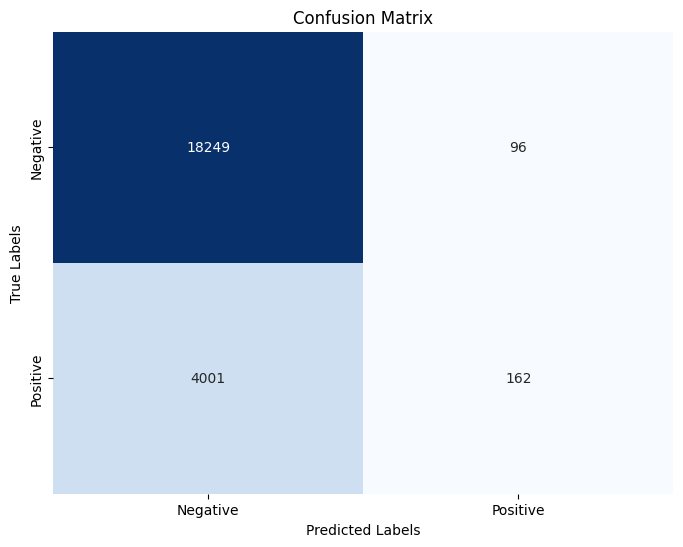

In [68]:
get_classification_metrics(y_test, y_pred)

Usando Upsampling

In [69]:
from sklearn.utils import resample

data_no_retraso = data[data["atraso_15"] == 0]
data_atraso = data[data["atraso_15"] == 1]

data_atraso_upsampled = resample(
    data_atraso,
    replace=True,  # sample with replacement
    n_samples=30000,  # to match majority class
    random_state=42,
)  # reproducible results

data_upsampled = pd.concat([data_no_retraso, data_atraso_upsampled])

features_upsampled = pd.concat(
    [
        pd.get_dummies(data_upsampled["OPERA"], prefix="OPERA"),
        pd.get_dummies(data_upsampled["TIPOVUELO"], prefix="TIPOVUELO"),
        pd.get_dummies(data_upsampled["MES"], prefix="MES"),
    ],
    axis=1,
)
label_upsampled = data_upsampled["atraso_15"]

(
    x_upsampled_train,
    x_upsampled_test,
    y_upsampled_train,
    y_upsampled_test,
) = train_test_split(
    features_upsampled,
    label_upsampled,
    test_size=0.33,
    random_state=42,
    stratify=label_upsampled,
)

In [70]:
xgb_v4 = xgb.XGBClassifier(
    random_state=1, learning_rate=0.01, subsample=1, max_depth=10, eval_metric="auc"
)
xgb_v4 = xgb_v4.fit(x_upsampled_train, y_upsampled_train)

In [71]:
y_upsampled_pred = xgb_v4.predict_proba(x_upsampled_test)[:, 1]

Getting metrics
------------------------------------------
accuracy: 0.6757416979395313
precision: 0.6256358087487284
recall: 0.18636363636363637
f1: 0.2871818818585104
AUC: 0.6656564830689982
Confusion Matrix:


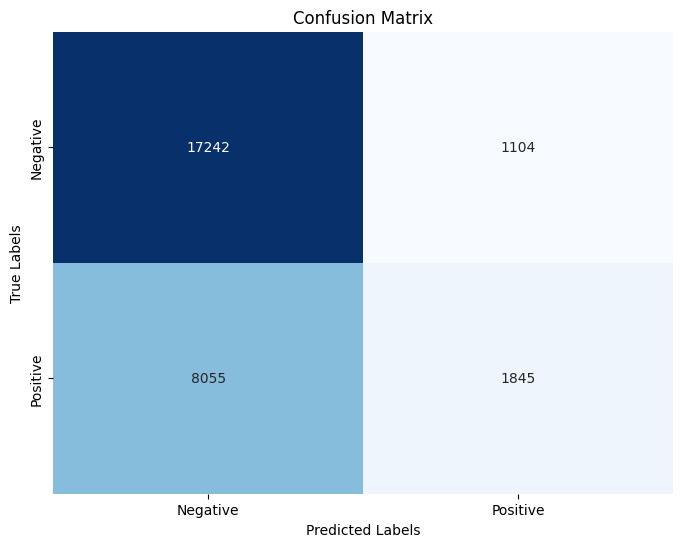

In [72]:
get_classification_metrics(y_upsampled_test, y_upsampled_pred)

#### 1.4 ¿Cuál es el mejor modelo?

Según lo visto en las métricas de cada modelo luego de los cambios realizados, todos los modelos son malos pero el que tiene mejor performance por un márgen pequeño es el modelo XGBoost V3 (usando todos los features y con hyperparameter tuning).
Debido al desbalance en el dataset, todos los modelos tienen un alto accuracy ya que predicen correctamente la clase mayoritaria (vuelo no retrasado) pero se equivocan bastante con falsos negativos y falsos positivos. El modelo V3 tiene un pequeño márgen a su favor, lo que se puede atribuir a que está usando todos los features (en comparación a XGBoost V2) y que se hizo hyperparameter tuning con GridSearch.

### 2. Cambios sobre el modelo de Juan

#### 2.1 No usar dummy variables, usar Categorical dtype

Dado a que nuestro dataset tiene en su mayoría columnas con "etiquetas" compuestas ya sea por nombres o por un número finito de números, se vuelve engorroso convertir cada una de esas columnas en one-hot encoding y agregar demasiadas columnas en el modelo. Esto puede ser un detalle relevante cuando el modelo se pone en producción junto con un endpoint de predicción, puesto que el request que habría que mandarle al modelo tendría demasiadas variables.

Tomando esto en cuenta, propongo utilizar esas columnas pero con dtype Categorical de Pandas. Tanto XGBoost como LightGBM ofrecen soporte para este tipo de campos (aunque con algunos detalles), lo que facilita el entrenamiento de los modelos.

In [20]:
relevant_features = [
    "DIA",
    "MES",
    "DIANOM",
    "TIPOVUELO",
    "OPERA",
    "SIGLADES",
    "temporada_alta",
    "atraso_15",
    "periodo_dia",
]

data_v2 = shuffle(
    df[relevant_features],
    random_state=111,
)

data_v2 = data_v2.rename(
    columns={
        "temporada_alta": "TEMPORADAALTA",
        "atraso_15": "ATRASO15",
        "periodo_dia": "PERIODODIA",
    }
)

In [21]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 13375 to 10196
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DIA            68206 non-null  int64 
 1   MES            68206 non-null  int64 
 2   DIANOM         68206 non-null  object
 3   TIPOVUELO      68206 non-null  object
 4   OPERA          68206 non-null  object
 5   SIGLADES       68206 non-null  object
 6   TEMPORADAALTA  68206 non-null  int64 
 7   ATRASO15       68206 non-null  int32 
 8   PERIODODIA     68206 non-null  object
dtypes: int32(1), int64(3), object(5)
memory usage: 4.9+ MB


In [22]:
data_v2["TEMPORADAALTA"] = data_v2["TEMPORADAALTA"].astype(int)
data_v2["DIA"] = pd.Categorical(data_v2["DIA"])
data_v2["MES"] = pd.Categorical(data_v2["MES"])
data_v2["DIANOM"] = pd.Categorical(data_v2["DIANOM"])
data_v2["TIPOVUELO"] = pd.Categorical(data_v2["TIPOVUELO"])
data_v2["OPERA"] = pd.Categorical(data_v2["OPERA"])
data_v2["SIGLADES"] = pd.Categorical(data_v2["SIGLADES"])
data_v2["PERIODODIA"] = pd.Categorical(data_v2["PERIODODIA"])

In [23]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 13375 to 10196
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   DIA            68206 non-null  category
 1   MES            68206 non-null  category
 2   DIANOM         68206 non-null  category
 3   TIPOVUELO      68206 non-null  category
 4   OPERA          68206 non-null  category
 5   SIGLADES       68206 non-null  category
 6   TEMPORADAALTA  68206 non-null  int32   
 7   ATRASO15       68206 non-null  int32   
 8   PERIODODIA     68206 non-null  category
dtypes: category(7), int32(2)
memory usage: 1.5 MB


In [24]:
train_features = [
    "DIA",
    "MES",
    "DIANOM",
    "TIPOVUELO",
    "OPERA",
    "SIGLADES",
    "TEMPORADAALTA",
    "PERIODODIA",
]

target = "ATRASO15"

x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(
    data_v2[train_features],
    data_v2[target],
    test_size=0.33,
    random_state=42,
    stratify=data_v2[target],
)

In [25]:
print(x_train_v2.shape, x_test_v2.shape)
print(y_train_v2.shape, y_test_v2.shape)

(45698, 8) (22508, 8)
(45698,) (22508,)


In [110]:
y_train_v2.value_counts(normalize=True)

0    0.815068
1    0.184932
Name: ATRASO15, dtype: float64

In [111]:
y_test_v2.value_counts(normalize=True)

0    0.815044
1    0.184956
Name: ATRASO15, dtype: float64

#### 2.2 XGBoost

Hay un problema relacionado a usar Categoricals y XGBoost. Tanto al construir un modelo con la librería directa de XGBoost o usando su api de sklearn, se pueden utilizar Categorical features. PERO: Si se usa la api de sklearn, que entrega bastantes beneficios, no se puede utilizar el tree_method='exact' (que es el algoritmo usado para la construcción de los árboles). Se debe usar otro método como 'approx', 'hist' o 'gpu_hist', los que no tienen el mismo performance que se logra usando 'exact'. Por lo tanto, si se desean usar Categoricals de todos modos, es recomendable usar XGBoost directo sin la api de sklearn.

In [131]:
# define helper function to train xgb model
def build_xgb_model(
    train_X: pd.DataFrame,
    train_y: pd.Series,
    categorical: bool = True,
    params: dict = {},
    verbose_eval: bool = True,
) -> xgb.Booster:
    def_params = {
        "learning_rate": 0.1,
        "max_depth": 8,
        "min_child_weight": 100,
        "subsample": 0.9,
        "objective": "binary:logistic",
        "nthread": 8,
        "seed": 2023,
        "tree_method": "exact",
        "n_estimators": 500,
    }

    for p, v in params.items():
        def_params[p] = v

    train_d_matrix = xgb.DMatrix(train_X, train_y, enable_categorical=categorical)

    num_boost_round = def_params.pop("n_estimators")
    model = xgb.train(
        def_params,
        train_d_matrix,
        evals=[
            (train_d_matrix, "train"),
        ],
        early_stopping_rounds=20,
        num_boost_round=num_boost_round,
        verbose_eval=verbose_eval,
    )

    return model

In [135]:
xgb_classifier_params = {
    "eval_metric": "auc",
}
xgb_classifier_model = build_xgb_model(
    x_train_v2, y_train_v2, params=xgb_classifier_params, verbose_eval=False
)

In [138]:
y_pred_v2 = xgb_classifier_model.predict(
    xgb.DMatrix(x_test_v2, enable_categorical=True)
)

Getting metrics
------------------------------------------
accuracy: 0.8237071263550737
precision: 0.5964391691394659
recall: 0.1448474657698775
f1: 0.23308851952068035
AUC: 0.7271290313562607
Confusion Matrix:


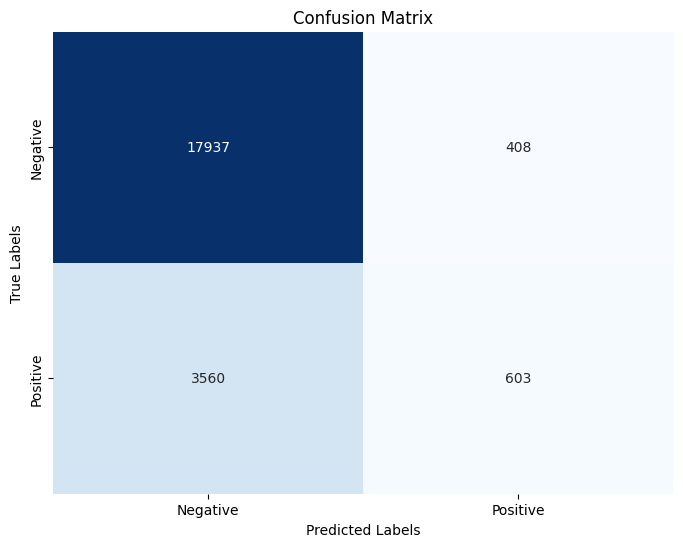

In [139]:
get_classification_metrics(y_test_v2, y_pred_v2)

Hay una mejora! Y si hacemos un simple grid search?

In [142]:
%%time
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [2, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 500],
    'subsample': [0.9, 0.95, 1],
}

# Perform grid search
best_auc = 0.0
best_params = {}

for max_depth in param_grid['max_depth']:
    for learning_rate in param_grid['learning_rate']:
        for n_estimators in param_grid['n_estimators']:
            for subsample in param_grid['subsample']:
                params = {
                    'max_depth': max_depth,
                    'learning_rate': learning_rate,
                    'n_estimators': n_estimators,
                    'subsample': subsample,
                    'eval_metric': 'auc',
                }
                
                # Train the XGBoost model
                xgb_model = build_xgb_model(
                                x_train_v2, y_train_v2, params=params, verbose_eval=False
                            )
                
                # Predict probabilities on the test set
                y_pred_v2 = xgb_model.predict(xgb.DMatrix(x_test_v2, enable_categorical=True))
                
                # Calculate AUC score
                auc_score = roc_auc_score(y_test_v2, y_pred_v2)
                
                # Update best AUC score and parameters if necessary
                if auc_score > best_auc:
                    best_auc = auc_score
                    best_params = params

# Print the best hyperparameters and the corresponding AUC score
print("Best Hyperparameters: ", best_params)
print("Best AUC Score: ", best_auc)

Best Hyperparameters:  {'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 500, 'subsample': 1, 'eval_metric': 'auc'}
Best AUC Score:  0.7275590811001171
CPU times: total: 22min 4s
Wall time: 2min 47s


In [143]:
# we train the model with the best parameters
xgb_best_model = build_xgb_model(
    x_train_v2, y_train_v2, params=best_params, verbose_eval=False
)

In [144]:
y_pred_v2 = xgb_best_model.predict(xgb.DMatrix(x_test_v2, enable_categorical=True))

Getting metrics
------------------------------------------
accuracy: 0.824728985249689
precision: 0.6020599250936329
recall: 0.1544559212106654
f1: 0.24584209520168226
AUC: 0.7275590811001171
Confusion Matrix:


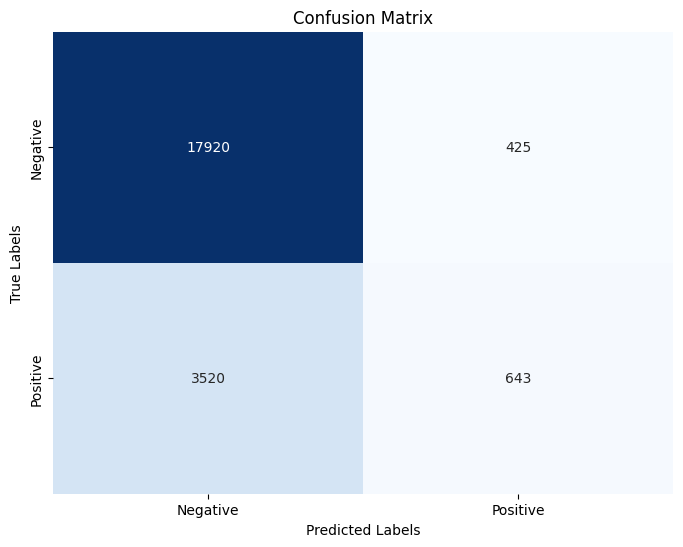

In [145]:
get_classification_metrics(y_test_v2, y_pred_v2)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

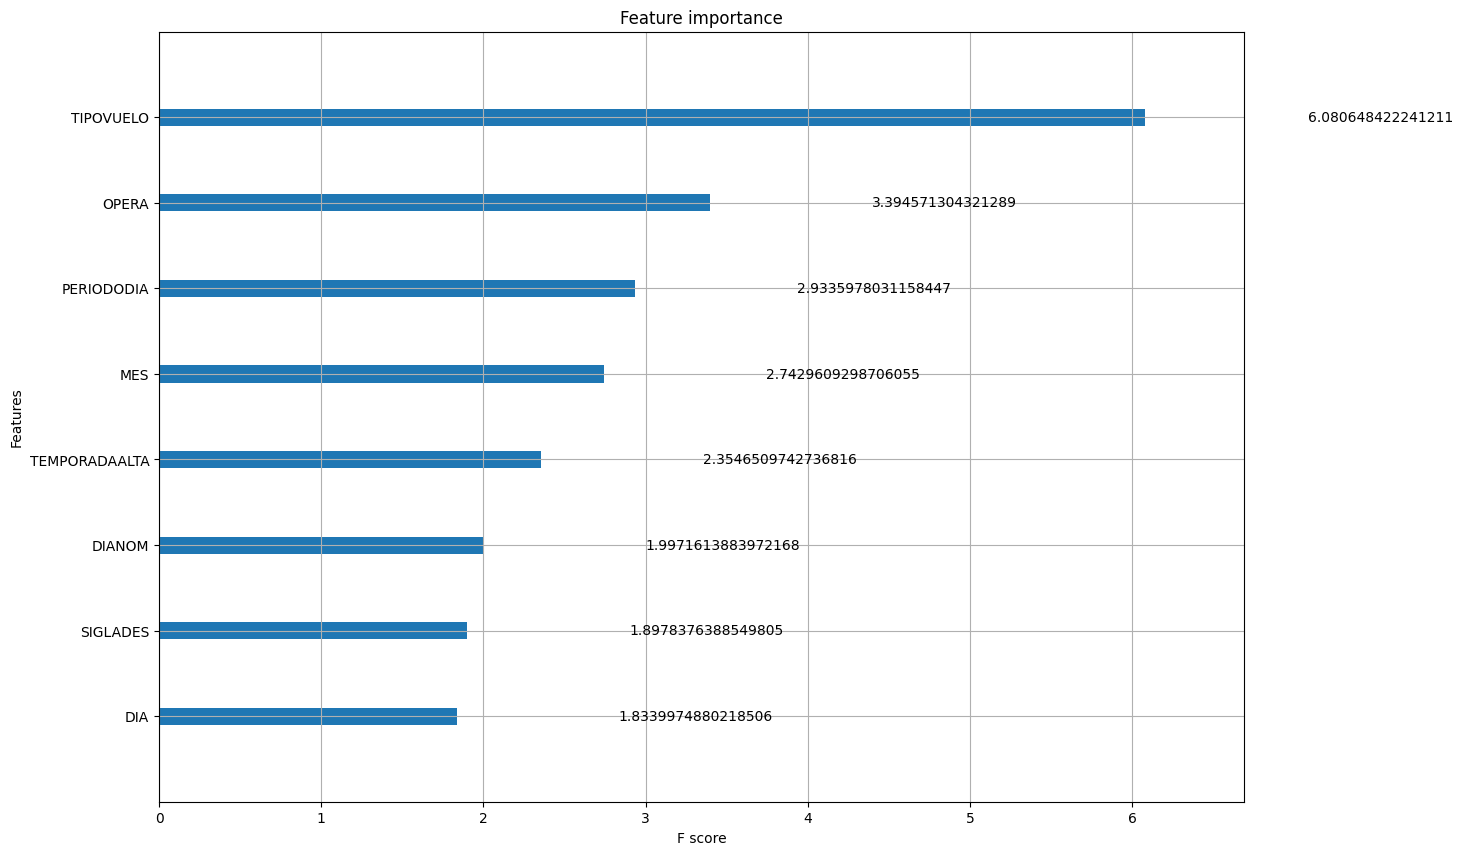

In [147]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_importance(xgb_best_model, importance_type="gain", ax=ax)

#### 2.3 LightGBM

Podemos usar LightGBM para entrenar un clasificador. Esta librería es más liviana que XGBoost, genera modelos más rápidos y en ciertos casos mejores que los de XGBoost, por lo que vale la pena probarla.

In [26]:
import lightgbm as lgb

params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.1,
    "n_estimators": 500,
    # 'early_stopping_rounds': 50,
    "seed": 2023,
}

lgbm_model = lgb.LGBMClassifier(**params)
lgbm_model = lgbm_model.fit(x_train_v2, y_train_v2)

In [157]:
y_pred_v2 = lgbm_model.predict_proba(x_test_v2)[:, 1]

Getting metrics
------------------------------------------
accuracy: 0.8185534032344055
precision: 0.525599481529488
recall: 0.19481143406197454
f1: 0.2842621801612338
AUC: 0.7214889871688885
Confusion Matrix:


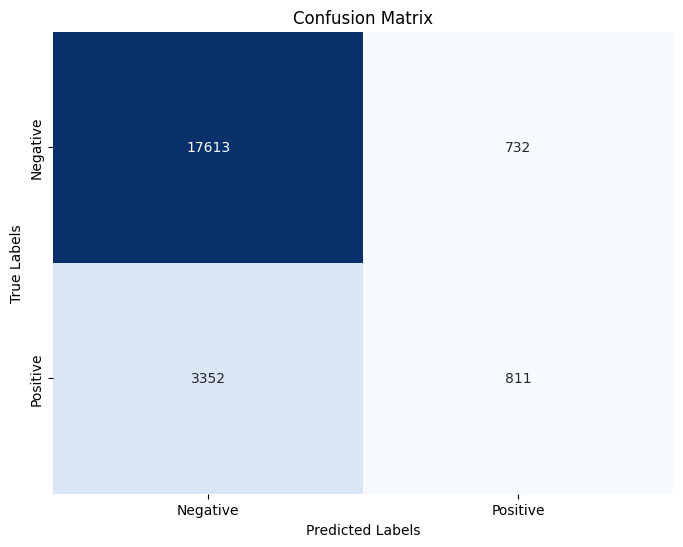

In [158]:
get_classification_metrics(y_test_v2, y_pred_v2)

Y si hacemos grid search sobre LightGBM para encontrar mejores hiperparámetros?

In [27]:
%%time
# Create a LightGBM classifier
def_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'seed': 2023,
}

lgb_model = lgb.LGBMClassifier(**def_params)

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [2, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 500],
    'subsample': [0.9, 0.95, 1],
    'num_leaves': [15, 31, 40]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(x_train_v2, y_train_v2)

# Print the best hyperparameters and the corresponding AUC score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best AUC Score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_v2 = best_model.predict_proba(x_test_v2)[:, 1]
auc_score = roc_auc_score(y_test_v2, y_pred_v2)
print("AUC Score on Test Set: ", auc_score)

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 31, 'subsample': 0.9}
Best AUC Score:  0.7231190649079252
AUC Score on Test Set:  0.726441217576455
CPU times: total: 8.75 s
Wall time: 2min 20s


Getting metrics
------------------------------------------
accuracy: 0.8255731295539364
precision: 0.6399055489964581
recall: 0.13019457122267594
f1: 0.21636726546906188
AUC: 0.726441217576455
Confusion Matrix:


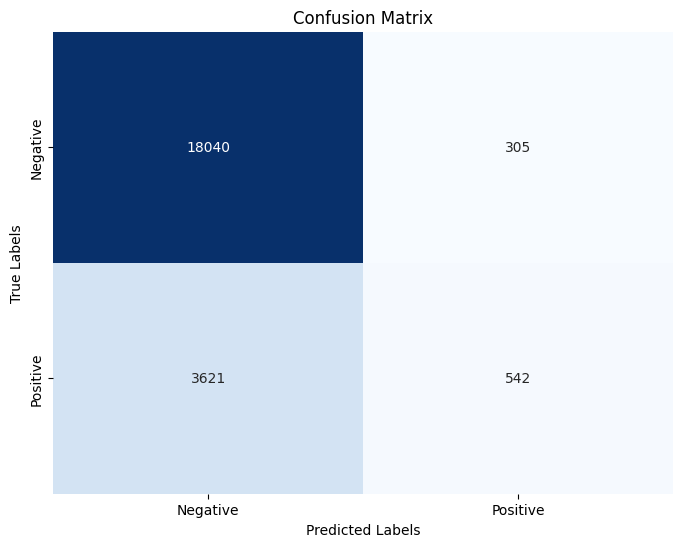

In [171]:
get_classification_metrics(y_test_v2, y_pred_v2)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

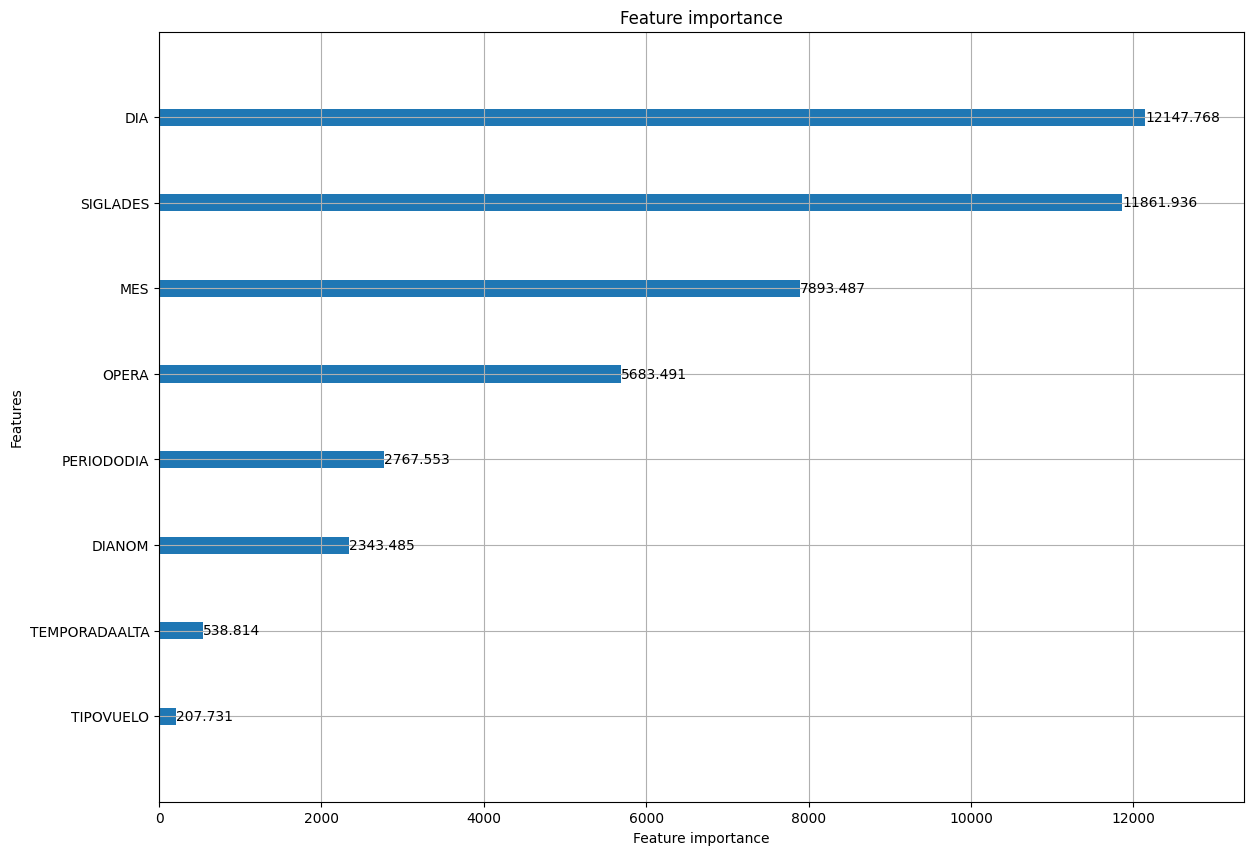

In [173]:
fig, ax = plt.subplots(figsize=(14, 10))
lgb.plot_importance(best_model, importance_type="gain", ax=ax)

### 3. Serializar modelo con mejor performance

Luego de entrenar y evaluar los nuevos modelos usando Categorical features, se puede ver que el performance es mejor para los 4 en comparación a los modelos originales de Juan si miramos sus AUC scores. Finalmente, nos quedamos con LightGBM con hyperparameter tuning puesto que es más liviano que XGBoost y además nos permite utilizar la api de sklearn directamente para analizar el modelo.

In [29]:
import joblib

# guardar en la info del modelo la lista de valores posibles para features Categorical
model_data = {
    "trained_model": best_model,
    "dia_values": x_train_v2["DIA"].cat.categories.tolist(),
    "mes_values": x_train_v2["MES"].cat.categories.tolist(),
    "dianom_values": x_train_v2["DIANOM"].cat.categories.tolist(),
    "tipovuelo_values": x_train_v2["TIPOVUELO"].cat.categories.tolist(),
    "opera_values": x_train_v2["OPERA"].cat.categories.tolist(),
    "siglades_values": x_train_v2["SIGLADES"].cat.categories.tolist(),
    "periododia_values": x_train_v2["PERIODODIA"].cat.categories.tolist(),
}

joblib.dump(model_data, "flight_delays_lgb_model.pkl")

['flight_delays_lgb_model.pkl']

In [188]:
data_v2.iloc[:5]

,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,TEMPORADAALTA,ATRASO15,PERIODODIA
13375,24,3,Viernes,N,Sky Airline,Antofagasta,0,0,mañana
35799,27,7,Jueves,N,Grupo LATAM,Concepcion,1,0,noche
48176,13,9,Miercoles,N,Grupo LATAM,Arica,1,0,noche
58675,3,11,Viernes,N,Grupo LATAM,Iquique,0,0,mañana
23374,29,5,Lunes,N,Sky Airline,Valdivia,0,0,mañana
